# Mohsen Qaysi - 122544676
### Assignment Part 2
- Pleae Run All Cells ... the code will not take long to downlaod data 1:18 seconds to be exact.
- I have included a data sample in a zip file in a CSV format.
- The script will regenerate them as we.

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Part 1
## Data collection

In [693]:
import pandas as pd
import numpy as np
import re
import csv
import os.path as pathFile
import os
import urllib.request as request
from bs4 import BeautifulSoup as bs

import matplotlib
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
url = 'http://mlg.ucd.ie/modules/COMP41680/archive/index.html'
url_prefix = 'http://mlg.ucd.ie/modules/COMP41680/archive/'

### Fetch All the Articales URLs
- I am using ***mode = 'a'*** because I am writing data for each link.
this might add new data to old ones if the file exist before. 

In [694]:
# Article Category , Article Title
def write_Articles_to_CSV(fileName, key,link):
    for i,df in enumerate(pd.read_html(link)):
        sum_articles =+ len(df)
#         return sum_articles
#         print('{} {}'.format(key, sum))

# Drop the NaN Value from the table
        df = df.dropna(axis=0,how='any')
        df.to_csv(fileName, mode='a', index = False, header = False)
        return sum_articles

#### Parse each Month's URLs.

In [695]:
def fetch_data_from_url(prefix, url_to_fetch):

    try:
        html_page = request.urlopen(url_to_fetch)
        soup = bs(html_page, 'html.parser')
        main_page_months_links_keys = []
        main_page_months_links = []

        for link in soup.find_all('a', attrs={'href': re.compile('')}):
            newURL = url_prefix + link.get('href')
            if newURL in main_page_months_links:
                pass
            else:
                key = newURL.rsplit('/', 1)[1]
                main_page_months_links_keys.append(key)
                main_page_months_links.append(newURL)

        '''
        pop() => the last elements ... because it is the main url_prefixes URL
        '''
        main_page_months_links_keys.pop()
        main_page_months_links.pop()
        dictionary = dict(zip(main_page_months_links_keys, main_page_months_links))
        return dictionary
    except Exception as e:
        print(e)

#### This block acts as the main 

In [696]:
def main():
    all_articles_categories = 'all_articles_categories.csv'
    News_Article_Archive_linkes = fetch_data_from_url(url_prefix, url)
    print(len(News_Article_Archive_linkes))
    # if file is there delete it
    if pathFile.isfile(all_articles_categories):
            print('The file does exists')
            os.remove(all_articles_categories)

    print('Create a file')
    # create a file and poplaute it with data.
    overAllDict = []
    month_number_of_articles = []
    for key,link in News_Article_Archive_linkes.items():
    #     print('month: ', key)
    #     print('link: ',link)
       # Get the month and the total number of artiles published in it
        numer_of_articles = write_Articles_to_CSV(all_articles_categories,key,link)
        month_number_of_articles.append({key : numer_of_articles})
        all_news_articles = fetch_data_from_url(url_prefix, link)
        # get all article links for each month
        # print(all_news_articles)
        overAllDict.append(all_news_articles)
    month_number_of_articles

if __name__ == '__main__':
    main()

12
Create a file


### Write each article URLs in CSV file for later use

In [697]:
def write_articles_to_CSV(fileName,data_dict,operation = 'w'):
    try:
        with open(fileName, operation) as csvfile:
            fieldnames = ['Article', 'URL']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for key,values in enumerate(data_dict):
                for key,value in values.items():
                    # Pass the home page
                    if key == 'index.html':
                        pass
                    else:
                        newURL = url_prefix + key
                        writer.writerow({'Article': key , 'URL': newURL})
    except Exception as e:
        print('write_articles_to_CSV: {}'.format(e))

### Write each article content:
- ***{key: title, vlaue: body}*** in CSV file for later use.
- I had to pass the acual extracted vlaues: title and body raw to the fucntion.

In [698]:
def write_articles_Contents_to_CSV(fileName,key,value,operation = 'w'):
    try:
        with open(fileName, operation) as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow([key , value])
    except Exception as e:
        print('write_articles_Contents_to_CSV: {}'.format(e))

In [699]:
all_articles_URL_File = 'all_articles_URLs.csv'
write_articles_to_CSV(all_articles_URL_File,overAllDict)

#### Read the saved URLs back 

In [700]:
get_all_Articles_URLs_from_CSV = []
def read_articles_from_CSV(fileName):
    try:
        with open(fileName) as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                get_all_Articles_URLs_from_CSV.append((row['URL']))
        return get_all_Articles_URLs_from_CSV
    except Exception as e:
        print('read_articles_from_CSV: {}'.format(e))

### read the html page content:
- Extract the title and body.

In [701]:
def read_html_page_Content(url):
    body_content = ''
    try:
        html_page = request.urlopen(url)
        soup = bs(html_page, 'html.parser')
        # get the article title:
        title = soup.find('h2').text
        # Remove the notice tag from the <div>
        soup.find('p',attrs={"class":"notice"}).decompose()
        # get the article body
        article = soup.find("div", {"class":"main"}).find_all('p')
        for element in article:
            body_content += '\n' + ''.join(element.find_all(text = True))
#         print(body_content)
        return title, body_content #dict(zip(title, body.getText()))
    except Exception as e:
        print('read_html_page_Content: {}'.format(e))

### Get all the articles URLs for the CSV file

In [702]:
all_URLs = read_articles_from_CSV(all_articles_URL_File)

### Number of Articles obtained

In [703]:
print(len(all_URLs))

1408


### For Each Article Get its Conetents:
* H2 => header
* Body => text content

In [704]:
print('Scraping Articles Contents... please wait!')
articles_Contents = 'articles_Contents.csv'
if pathFile.isfile(articles_Contents):
        print('The file does exists')
        os.remove(articles_Contents)
for eachURL in all_URLs:
    title,body = read_html_page_Content(eachURL)
    write_articles_Contents_to_CSV(articles_Contents,title,body,'a')
#     print('Title: {}\nBody: {}\n-------------'.format(title,body))
print('Done Scraping Articles Contents.')

Scraping Articles Contents... please wait!
Done Scraping Articles Contents.


### All the data collection is done above

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Part 2

### Analyse the collected data

# Use panda to read all saved csv files
- add missing headers.

In [705]:
# read in all data from files 
all_articles_categories_df = pd.read_csv(all_articles_categories, names = ['Category','Titile'])
all_articles_URL_File_df = pd.read_csv(all_articles_URL_File)
articles_Contents_df = pd.read_csv(articles_Contents,names = ['Titile','Body'])

In [706]:
all_articles_categories_df.head()

,Category,Titile
0,technology,21st-Century Sports: How Digital Technology Is...
1,business,Asian quake hits European shares
2,technology,BT offers free net phone calls
3,business,Barclays shares up on merger talk
4,sport,Barkley fit for match in Ireland


In [707]:
# print the shape
all_articles_categories_df.shape

(1408, 2)

In [708]:
# show the df frist 10 values
all_articles_URL_File_df.head(10)

,Article,URL
0,article-jan-0418.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...
1,article-jan-0027.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...
2,article-jan-0631.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...
3,article-jan-2105.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...
4,article-jan-3300.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...
5,article-jan-4187.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...
6,article-jan-1974.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...
7,article-jan-3666.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...
8,article-jan-2629.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...
9,article-jan-2415.html,http://mlg.ucd.ie/modules/COMP41680/archive/ar...


In [709]:
all_articles_URL_File_df.shape

(1408, 2)

In [710]:
articles_Contents_df.head(10)

,Titile,Body
0,21st-Century Sports: How Digital Technology Is...,\n\nThe sporting industry has come a long way ...
1,Asian quake hits European shares,\nAsian quake hits European shares\n\nShares i...
2,BT offers free net phone calls,\n\nBT is offering customers free internet tel...
3,Barclays shares up on merger talk,\nBarclays shares up on merger talk\n\nShares ...
4,Barkley fit for match in Ireland,\n\nEngland centre Olly Barkley has been passe...
5,Bellamy under new fire,\nBellamy under new fire\n\nNewcastle boss Gra...
6,Benitez 'to launch Morientes bid',\nBenitez 'to launch Morientes bid'\n\nLiverpo...
7,Benitez delight after crucial win,\n\nLiverpool manager Rafael Benitez admitted ...
8,Big war games battle it out,\n\nThe arrival of new titles in the popular M...
9,British Library gets wireless net,\n\nVisitors to the British Library will be ab...


In [711]:
articles_Contents_df.shape

(1408, 2)

In [712]:
"""Slices the category colunm for later use"""
all_articles_Category_colm_df = all_articles_categories_df.iloc[:,0]

In [713]:
type(all_articles_Category_colm_df)

pandas.core.series.Series

### Merged two data frames togther:
+ all_articles_Category_colm_df =>   ***which only contains the categoies column.***
+ articles_Contents_df =>   ***which contains the article tilile and voday.***

In [714]:
"""Merge the sliced category df with the articles_Contents_df for easy readability"""
merged_df = pd.concat([all_articles_Category_colm_df, articles_Contents_df], axis=1)

In [715]:
merged_df.head(10)

,Category,Titile,Body
0,technology,21st-Century Sports: How Digital Technology Is...,\n\nThe sporting industry has come a long way ...
1,business,Asian quake hits European shares,\nAsian quake hits European shares\n\nShares i...
2,technology,BT offers free net phone calls,\n\nBT is offering customers free internet tel...
3,business,Barclays shares up on merger talk,\nBarclays shares up on merger talk\n\nShares ...
4,sport,Barkley fit for match in Ireland,\n\nEngland centre Olly Barkley has been passe...
5,sport,Bellamy under new fire,\nBellamy under new fire\n\nNewcastle boss Gra...
6,sport,Benitez 'to launch Morientes bid',\nBenitez 'to launch Morientes bid'\n\nLiverpo...
7,sport,Benitez delight after crucial win,\n\nLiverpool manager Rafael Benitez admitted ...
8,technology,Big war games battle it out,\n\nThe arrival of new titles in the popular M...
9,technology,British Library gets wireless net,\n\nVisitors to the British Library will be ab...


### Clean data before saving them 
+ ***Remove NaN***

In [716]:
"""Drop any row missing data"""
fileName = 'merged_contents.csv'
merged_df = merged_df.dropna(axis=0,how='any')
merged_df.to_csv(fileName, mode='w', index = False, header = True)

In [717]:
# check size
merged_df.size

4224

In [718]:
# check type
type(merged_df)

pandas.core.frame.DataFrame

#### Double check for missing vlaues if any

In [719]:
all_articles_categories_df.head().isnull

<bound method NDFrame.isnull of      Category                                             Titile
0  technology  21st-Century Sports: How Digital Technology Is...
1    business                   Asian quake hits European shares
2  technology                     BT offers free net phone calls
3    business                  Barclays shares up on merger talk
4       sport                   Barkley fit for match in Ireland>

In [720]:
all_articles_URL_File_df.head().isnull

<bound method NDFrame.isnull of                  Article                                                URL
0  article-jan-0418.html  http://mlg.ucd.ie/modules/COMP41680/archive/ar...
1  article-jan-0027.html  http://mlg.ucd.ie/modules/COMP41680/archive/ar...
2  article-jan-0631.html  http://mlg.ucd.ie/modules/COMP41680/archive/ar...
3  article-jan-2105.html  http://mlg.ucd.ie/modules/COMP41680/archive/ar...
4  article-jan-3300.html  http://mlg.ucd.ie/modules/COMP41680/archive/ar...>

In [721]:
articles_Contents_df.head().isnull

<bound method NDFrame.isnull of                                               Titile  \
0  21st-Century Sports: How Digital Technology Is...   
1                   Asian quake hits European shares   
2                     BT offers free net phone calls   
3                  Barclays shares up on merger talk   
4                   Barkley fit for match in Ireland   

                                                Body  
0  \n\nThe sporting industry has come a long way ...  
1  \nAsian quake hits European shares\n\nShares i...  
2  \n\nBT is offering customers free internet tel...  
3  \nBarclays shares up on merger talk\n\nShares ...  
4  \n\nEngland centre Olly Barkley has been passe...  >

### Get classes labels:

In [722]:
lables = [] # we expect those 3 ['technology', 'business', 'sport']
for cat,title in all_articles_Category_colm_df.items():
#     print(title)
    if title in lables:
        pass
    elif title != 'Article Category':
        lables.append(title)

In [723]:
lables

['technology', 'business', 'sport']

In [724]:
type(merged_df)

pandas.core.frame.DataFrame

### Check the Category distribution

In [725]:
merged_df.Category.value_counts()

sport         526
business      491
technology    391
Name: Category, dtype: int64

### Labels Mapping:
we assigned each category a value:
+ 0 => technology.
+ 1 => business.
+ 2 => sport.

### Convert Category to a numerical variable

In [726]:
merged_df['Category_num'] = merged_df.Category.map({lables[0]: 0.0, lables[1]: 1.0, lables[2] : 2.0})

In [727]:
# check that the conversion worked
merged_df.head(10)

,Category,Titile,Body,Category_num
0,technology,21st-Century Sports: How Digital Technology Is...,\n\nThe sporting industry has come a long way ...,0.0
1,business,Asian quake hits European shares,\nAsian quake hits European shares\n\nShares i...,1.0
2,technology,BT offers free net phone calls,\n\nBT is offering customers free internet tel...,0.0
3,business,Barclays shares up on merger talk,\nBarclays shares up on merger talk\n\nShares ...,1.0
4,sport,Barkley fit for match in Ireland,\n\nEngland centre Olly Barkley has been passe...,2.0
5,sport,Bellamy under new fire,\nBellamy under new fire\n\nNewcastle boss Gra...,2.0
6,sport,Benitez 'to launch Morientes bid',\nBenitez 'to launch Morientes bid'\n\nLiverpo...,2.0
7,sport,Benitez delight after crucial win,\n\nLiverpool manager Rafael Benitez admitted ...,2.0
8,technology,Big war games battle it out,\n\nThe arrival of new titles in the popular M...,0.0
9,technology,British Library gets wireless net,\n\nVisitors to the British Library will be ab...,0.0


In [728]:
"""store the feature matrix (X) and response vector (y)"""
X = merged_df.Body
y = merged_df.Category_num

In [729]:
# check the shapes of X and y
print(X.shape)
print(y.shape)

(1408,)
(1408,)


### Using the 20 to 80 precent ration to slices the data.

In [730]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1126,)
(282,)
(1126,)
(282,)


## Vectorizing our dataset
- user some weighing and filtering matrix

In [731]:
"""import and instantiate CountVectorizer (with the default parameters)"""
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
"""remove English stop words and include ngram_range=(1, 2) companation"""
# vect = CountVectorizer(stop_words='english',max_df=0.5,min_df=2)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2),max_df=0.5)

In [732]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)

In [733]:
# examine the document-term matrix
X_train_dtm

<1126x195019 sparse matrix of type '<class 'numpy.float64'>'
	with 382177 stored elements in Compressed Sparse Row format>

In [734]:
# display some sample weighted values
print(X_train_dtm[0])

  (0, 44556)	0.0326243689375
  (0, 160670)	0.032915747617
  (0, 164101)	0.143480996178
  (0, 72805)	0.110873577225
  (0, 120019)	0.0204972851684
  (0, 182398)	0.0363512826902
  (0, 121739)	0.0217573787296
  (0, 64112)	0.0900302035998
  (0, 100346)	0.0461318862802
  (0, 57652)	0.0301420514658
  (0, 65947)	0.0391535824889
  (0, 8573)	0.0157380722513
  (0, 114144)	0.0220253590954
  (0, 42311)	0.032915747617
  (0, 74667)	0.0263645580952
  (0, 59661)	0.472566674972
  (0, 55211)	0.309060884293
  (0, 102509)	0.0301420514658
  (0, 81321)	0.0363512826902
  (0, 19900)	0.0198354462464
  (0, 193960)	0.0328199626268
  (0, 192034)	0.0101403604364
  (0, 97147)	0.0173213083189
  (0, 106539)	0.0274705533562
  (0, 62175)	0.0190967619183
  :	:
  (0, 177110)	0.0343416235025
  (0, 159581)	0.0363512826902
  (0, 29259)	0.0363512826902
  (0, 70352)	0.0363512826902
  (0, 72732)	0.0363512826902
  (0, 17250)	0.0363512826902
  (0, 157123)	0.0363512826902
  (0, 132541)	0.0363512826902
  (0, 103035)	0.0363512826902

In [735]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<282x195019 sparse matrix of type '<class 'numpy.float64'>'
	with 57351 stored elements in Compressed Sparse Row format>

In [736]:
"""Get the some of the vocabualry we have"""
terms = vect.get_feature_names()
vocab = vect.vocabulary_
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 195019 distinct terms


In [737]:
"""show some of the vocabualry we have"""
print(terms[500:600])

['100 baikal', '100 bonds', '100 britain', '100 cent', '100 chosen', '100 companies', '100 countries', '100 date', '100 debt', '100 debts', '100 december', '100 decline', '100 depending', '100 difficult', '100 don', '100 employees', '100 exchange', '100 fighting', '100 firms', '100 foreign', '100 fresh', '100 gazprom', '100 gigabytes', '100 guarantee', '100 hard', '100 home', '100 hours', '100 iconic', '100 ids', '100 include', '100 index', '100 january', '100 jobs', '100 kfb', '100 km', '100 lawsuits', '100 lifetime', '100 list', '100 meet', '100 mentally', '100 metres', '100 million', '100 month', '100 multilateral', '100 new', '100 nigerian', '100 page', '100 parent', '100 people', '100 points', '100 popular', '100 portability', '100 really', '100 record', '100 rupees', '100 said', '100 server', '100 seven', '100 size', '100 staff', '100 sure', '100 telecom', '100 times', '100 trillion', '100 uk', '100 worth', '100 years', '1000', '1000 web', '1000m', '1000m major', '1000m swedish',

In [738]:
# what column is the term '2003 records' on?
vocab_nb['2003 records']

2670

## Building and evaluating a model
The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [739]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [740]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 34.9 ms, sys: 16.8 ms, total: 51.8 ms
Wall time: 52.2 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [741]:
# make class predictions for X_test_dtm
y_pred_class_nb = nb.predict(X_test_dtm)
y_pred_class_nb

array([ 2.,  0.,  2.,  2.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,  1.,  2.,
        2.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  1.,  0.,  0.,  1.,  2.,  2.,  0.,  1.,
        2.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  2.,  2.,  0.,
        1.,  1.,  2.,  0.,  1.,  0.,  2.,  0.,  1.,  2.,  2.,  0.,  1.,
        0.,  1.,  0.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,
        2.,  0.,  1.,  2.,  0.,  2.,  2.,  2.,  2.,  2.,  0.,  0.,  1.,
        0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  2.,  2.,  1.,
        1.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  0.,  1.,  2.,  1.,
        2.,  1.,  0.,  2.,  1.,  1.,  2.,  0.,  2.,  2.,  2.,  1.,  2.,
        2.,  1.,  1.,  0.,  1.,  0.,  1.,  2.,  2.,  2.,  2.,  1.,  0.,
        2.,  2.,  2.,  2.,  2.,  2.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,
        1.,  1.,  0.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
        2.,  1.,  1.,  0.,  2.,  2.,  0.,  1.,  0.,  2.,  2.,  0

In [742]:
# print the size of the y_pred
y_pred_class_nb.size

282

In [743]:
# calculate accuracy_nb of class predictions
from sklearn import metrics
accuracy_nb = metrics.accuracy_score(y_test, y_pred_class_nb)
print("Accuracy_nb = %.3f%%" % accuracy_nb)

Accuracy_nb = 0.982%


### NB Classification Error: classifier incorrect %?

In [744]:
print('Incorrect accuracy_nb = %.3f%%' % (1 - accuracy_nb))

Incorrect accuracy_nb = 0.018%


In [745]:
# calculate null accuracy_nb (for multi-class classification problems)
y_test.value_counts().head() / len(y_test)

2.0    0.372340
1.0    0.333333
0.0    0.294326
Name: Category_num, dtype: float64

In [746]:
# I took this code form this API: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Confusion matrix MultinomialNB

In [747]:
# print the confusion matrix
cm_nb = metrics.confusion_matrix(y_test, y_pred_class_nb)
cm_nb

array([[ 79,   1,   3],
       [  1,  93,   0],
       [  0,   0, 105]])

![image One](images/confusion_matrix_updated_1.png)

In [748]:
# get the lables
target_names = [lables[0], lables[1],lables[2]]

In [749]:
from sklearn.metrics import classification_report
target_names = [lables[0], lables[1],lables[2]]
print(classification_report(y_test, y_pred_class_nb, target_names=target_names))

             precision    recall  f1-score   support

 technology       0.99      0.95      0.97        83
   business       0.99      0.99      0.99        94
      sport       0.97      1.00      0.99       105

avg / total       0.98      0.98      0.98       282



# Analyse the Results Above:
- We can see that we were able to predict most of the tags correctlly from the table.
- ***For class 0 (technology)*** -> 79 out 83 were correcttly predicted. Only 4 were predicted wrong. 1 predicted as 1 (business) and 3 as 2 (sport).
- ***For class 1 (business)*** -> 93 out 94 were correcttly predicted. Only 1 was predicted wrong. 1 predicted as 0 (technology).
- ***For class 2 (sport)*** -> 105 out 105 were correcttly predicted.

Confusion matrix, without normalization


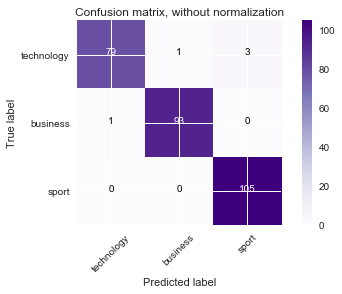

In [750]:
# plot non-normalized confusion matrix
plot_confusion_matrix(cm_nb, lables, title='Confusion matrix, without normalization')

Normalized confusion matrix


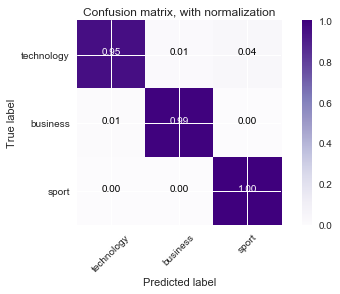

In [751]:
# normalized confusion matrix
plot_confusion_matrix(cm_nb, lables, normalize=True, title='Confusion matrix, with normalization')

# Analyse Results Above:
1. We can see that we were able to 

In [752]:
# print message text for the false positives
X_test[y_test < y_pred_class_nb]

1369    \nReport: Benitez delight after crucial win\n\...
866     \n\nSix years ago, Intercom invented business ...
777     \n\nCould Half-Life 2 possibly live up to the ...
1366    \nPlayers sought for $1m prize\n\nUK gamers ar...
Name: Body, dtype: object

In [753]:
# print message text for the false negatives
X_test[y_test > y_pred_class_nb]

529    \nMaking your office work for you\n\nOur missi...
Name: Body, dtype: object

### Labels meaning:
we assigned each category a value:
+ 0 => technology.
+ 1 => business.
+ 2 => sport.

In [754]:
lables

['technology', 'business', 'sport']

In [755]:
y_test[:10]

1112    2.0
1256    0.0
177     2.0
101     2.0
1037    1.0
616     1.0
767     2.0
546     0.0
1163    1.0
283     1.0
Name: Category_num, dtype: float64

In [756]:
y_pred_class_nb

array([ 2.,  0.,  2.,  2.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,  1.,  2.,
        2.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  1.,  0.,  0.,  1.,  2.,  2.,  0.,  1.,
        2.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  2.,  2.,  0.,
        1.,  1.,  2.,  0.,  1.,  0.,  2.,  0.,  1.,  2.,  2.,  0.,  1.,
        0.,  1.,  0.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,
        2.,  0.,  1.,  2.,  0.,  2.,  2.,  2.,  2.,  2.,  0.,  0.,  1.,
        0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  2.,  2.,  1.,
        1.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  0.,  1.,  2.,  1.,
        2.,  1.,  0.,  2.,  1.,  1.,  2.,  0.,  2.,  2.,  2.,  1.,  2.,
        2.,  1.,  1.,  0.,  1.,  0.,  1.,  2.,  2.,  2.,  2.,  1.,  0.,
        2.,  2.,  2.,  2.,  2.,  2.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,
        1.,  1.,  0.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
        2.,  1.,  1.,  0.,  2.,  2.,  0.,  1.,  0.,  2.,  2.,  0

# Sample test:

In [757]:
merged_df[1112:1113]

,Category,Titile,Body,Category_num
1112,sport,Leeds v Saracens (Fri),\nLeeds v Saracens (Fri)\n\nHeadingley\n\nFrid...,2.0


### Create a df with y_pred_class_nb and X_test

In [758]:
X_test_df = X_test.to_frame()
y_pred_class_df_nb = pd.DataFrame({'Predicted Category': y_pred_class_nb,
                   "Body":  X_test})

In [759]:
y_pred_class_df_nb.head()

,Body,Predicted Category
1112,\nLeeds v Saracens (Fri)\n\nHeadingley\n\nFrid...,2.0
1256,\n\nThe Online News's online search engine was...,0.0
177,\n\nJuninho's agent has confirmed that the pla...,2.0
101,\nSports Stock Tips\n\nSports stocks are the b...,2.0
1037,\n\nUK house prices dipped slightly in Novembe...,1.0


### Test the Category prediction for NB

In [760]:
# merge thme for readiblity
overAll_pred_class_df_nb = pd.concat([merged_df, y_pred_class_df_nb], axis=1)
# Drop NaN values
overAll_pred_class_df_nb = overAll_pred_class_df_nb.dropna(axis=0,how='any')
overAll_pred_class_df_nb

,Category,Titile,Body,Category_num,Body,Predicted Category
3,business,Barclays shares up on merger talk,\nBarclays shares up on merger talk\n\nShares ...,1.0,\nBarclays shares up on merger talk\n\nShares ...,1.0
12,business,Bush to get 'tough' on deficit,\nBush to get 'tough' on deficit\n\nUS preside...,1.0,\nBush to get 'tough' on deficit\n\nUS preside...,1.0
19,sport,Charvis set to lose fitness bid,\n\nFlanker Colin Charvis is unlikely to play ...,2.0,\n\nFlanker Colin Charvis is unlikely to play ...,2.0
37,business,Fannie Mae 'should restate books',\n\nUS mortgage company Fannie Mae should rest...,1.0,\n\nUS mortgage company Fannie Mae should rest...,1.0
47,technology,Gangsters dominate gaming chart,\n\nVideo games on consoles and computers prov...,0.0,\n\nVideo games on consoles and computers prov...,0.0
48,sport,Gardener wins double in Glasgow,\nGardener wins double in Glasgow\n\nBritain's...,2.0,\nGardener wins double in Glasgow\n\nBritain's...,2.0
49,business,Gazprom 'in $36m back-tax claim',\n\nThe nuclear unit of Russian energy giant G...,1.0,\n\nThe nuclear unit of Russian energy giant G...,1.0
51,business,Germany calls for EU reform,\nGermany calls for EU reform\n\nGerman Chance...,1.0,\nGermany calls for EU reform\n\nGerman Chance...,1.0
56,sport,Henman decides to quit Davis Cup,\nHenman decides to quit Davis Cup\n\nTim Henm...,2.0,\nHenman decides to quit Davis Cup\n\nTim Henm...,2.0
58,sport,Hodgson shoulders England blame,\n\nFly-half Charlie Hodgson admitted his wayw...,2.0,\n\nFly-half Charlie Hodgson admitted his wayw...,2.0


### Full content of the article

In [761]:
merged_df_index = merged_df.as_matrix()
merged_df_index[1112]

array(['sport', 'Leeds v Saracens (Fri)',
       "\nLeeds v Saracens (Fri)\n\nHeadingley\n\nFriday, 25 February\n\n2000 GMT\n\nThe Tykes have brought in Newcastle prop Ed Kalman and Tom McGee from the Borders on loan while fly-half Craig McMullen has joined from Narbonne. Raphael Ibanez is named at hooker for Saracens in one of four changes. Simon Raiwalui and Ben Russell are also selected in the pack while Kevin Sorrell comes in at outside centre.\n\n- Friday's game at Headingley got the go-ahead on Friday after passing an early pitch inspection. Leeds: Balshaw; Rees, Christophers, Bell, Doherty; McMullen, Dickens; McGee, Rawlinson, Gerber; Murphy, Palmer (capt), Morgan, Parks, Popham. Replacements: Kalman, Regan, Hyde, Rigney, McMillan, Rock, Vickerman. Saracens: Bartholomeusz; Castaignede, Sorrell, Harris, Vaikona; Jackson, Bracken; Yates, Ibanez, Visagie; Raiwalui, Fullarton; Randell, Russell, Vyvyan (capt). Replacements: Cairns, Lloyd, Broster, Chesney, Johnston, Rauluni, Little."

In [762]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob[:10]

array([ 0.13597069,  0.14699416,  0.04177381,  0.17840968,  0.93623811,
        0.76684104,  0.03832146,  0.0628393 ,  0.7258362 ,  0.91379836])

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Comparing models

In [763]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
# logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=len(lables))

In [764]:
# train the model using X_train_dtm
%time knn.fit(X_train_dtm, y_train)

CPU times: user 4.47 ms, sys: 2.54 ms, total: 7.02 ms
Wall time: 5.17 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [765]:
# make class predictions for X_test_dtm
y_pred_class_knn = knn.predict(X_test_dtm)

In [766]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = knn.predict_proba(X_test_dtm)[:, 1]
y_pred_prob[:10]

array([ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.])

In [767]:
# calculate accuracy_knn
accuracy_knn = metrics.accuracy_score(y_test, y_pred_class_knn)
print("Accuracy = %.3f%%" % accuracy_knn)

Accuracy = 0.950%


In [768]:
print('Incorrect Accuracy = %.3f%%' % (1 - accuracy_knn))

Incorrect Accuracy = 0.050%


### KNN Classification Error: classifier incorrect %?

In [769]:
# calculate null accuracy_nb (for multi-class classification problems)
y_test.value_counts().head() / len(y_test)

2.0    0.372340
1.0    0.333333
0.0    0.294326
Name: Category_num, dtype: float64

In [770]:
# print the confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_class_knn)
cm_knn

array([[ 78,   4,   1],
       [  6,  87,   1],
       [  1,   1, 103]])

### Confusion matrix KNeighborsClassifier
![confusion matrix](images/confusion_matrix_updated_2.png)

In [771]:
print(classification_report(y_test, y_pred_class_knn, target_names=target_names))

             precision    recall  f1-score   support

 technology       0.92      0.94      0.93        83
   business       0.95      0.93      0.94        94
      sport       0.98      0.98      0.98       105

avg / total       0.95      0.95      0.95       282



# Analyse the Results Above:
- We can see that we were able to predict most of the tags correctlly from the table.
- ***For class 0 (technology)*** -> 78 out 83 were correcttly predicted. Only 5 were predicted wrong. 4 predicted as 1 (business) and 1 as 2 (sport).
- ***For class 1 (business)*** -> 87 out 94 were correcttly predicted. Only 7 were predicted wrong. 6 predicted as 0 (technology) and 1 as 2 (sport).
- ***For class 2 (sport)*** -> 103 out 105 were correcttly predicted. Only 2 were predicted wrong. 1 predicted as 0 (technology) and 1 as 1 (business).

Confusion matrix, without normalization


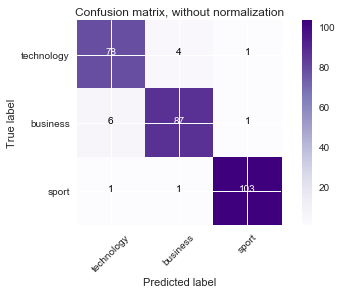

In [772]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(cm_knn, lables, title='Confusion matrix, without normalization')

Normalized confusion matrix


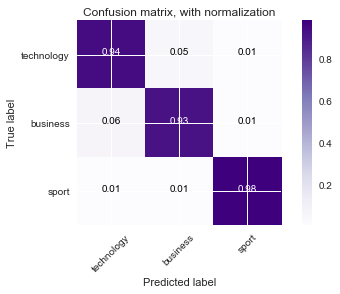

In [773]:
# plot normalized confusion matrix
plot_confusion_matrix(cm_knn, lables, normalize=True, title='Confusion matrix, with normalization')

In [774]:
y_pred_class_df_knn = pd.DataFrame({'Predicted Category': y_pred_class_knn,
                   "Body":  X_test})

In [775]:
y_pred_class_df_nb.head()

,Body,Predicted Category
1112,\nLeeds v Saracens (Fri)\n\nHeadingley\n\nFrid...,2.0
1256,\n\nThe Online News's online search engine was...,0.0
177,\n\nJuninho's agent has confirmed that the pla...,2.0
101,\nSports Stock Tips\n\nSports stocks are the b...,2.0
1037,\n\nUK house prices dipped slightly in Novembe...,1.0


### Test the Category prediction for KNN

In [776]:
# merge thme for readiblity
overAll_pred_class_df_knn = pd.concat([merged_df, y_pred_class_df_knn], axis=1)
# Drop NaN values
overAll_pred_class_df_knn = overAll_pred_class_df_knn.dropna(axis=0,how='any')
overAll_pred_class_df_knn

,Category,Titile,Body,Category_num,Body,Predicted Category
3,business,Barclays shares up on merger talk,\nBarclays shares up on merger talk\n\nShares ...,1.0,\nBarclays shares up on merger talk\n\nShares ...,1.0
12,business,Bush to get 'tough' on deficit,\nBush to get 'tough' on deficit\n\nUS preside...,1.0,\nBush to get 'tough' on deficit\n\nUS preside...,1.0
19,sport,Charvis set to lose fitness bid,\n\nFlanker Colin Charvis is unlikely to play ...,2.0,\n\nFlanker Colin Charvis is unlikely to play ...,2.0
37,business,Fannie Mae 'should restate books',\n\nUS mortgage company Fannie Mae should rest...,1.0,\n\nUS mortgage company Fannie Mae should rest...,0.0
47,technology,Gangsters dominate gaming chart,\n\nVideo games on consoles and computers prov...,0.0,\n\nVideo games on consoles and computers prov...,0.0
48,sport,Gardener wins double in Glasgow,\nGardener wins double in Glasgow\n\nBritain's...,2.0,\nGardener wins double in Glasgow\n\nBritain's...,2.0
49,business,Gazprom 'in $36m back-tax claim',\n\nThe nuclear unit of Russian energy giant G...,1.0,\n\nThe nuclear unit of Russian energy giant G...,1.0
51,business,Germany calls for EU reform,\nGermany calls for EU reform\n\nGerman Chance...,1.0,\nGermany calls for EU reform\n\nGerman Chance...,1.0
56,sport,Henman decides to quit Davis Cup,\nHenman decides to quit Davis Cup\n\nTim Henm...,2.0,\nHenman decides to quit Davis Cup\n\nTim Henm...,2.0
58,sport,Hodgson shoulders England blame,\n\nFly-half Charlie Hodgson admitted his wayw...,2.0,\n\nFly-half Charlie Hodgson admitted his wayw...,2.0


## Test the prediction of the **MultinomialNB**.

In [777]:
predict = nb.predict(X_test_dtm)
num_tech = (predict == 0).sum()
num_business = (predict == 1).sum()
num_sport = (predict == 2).sum()
print("Tech : %d" % num_tech)
print("Business: %d" % num_business)
print("Sport: %d" % num_sport)

Tech : 80
Business: 94
Sport: 108


## Test the prediction of the **KNeighborsClassifier**.

In [778]:
predict = knn.predict(X_test_dtm)
num_tech = (predict == 0).sum()
num_business = (predict == 1).sum()
num_sport = (predict == 2).sum()
print("Tech : %d" % num_tech)
print("Business: %d" % num_business)
print("Sport: %d" % num_sport)

Tech : 85
Business: 92
Sport: 105


## Examining a model for further insight

We will examine our **trained Naive Bayes model** to calculate the approximate **"category" of each token**.

In [779]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

195019

In [780]:
# examine the first 50 tokens
print(X_train_tokens[:50])

['00', '00 early', '00 minute', '00 qualifying', '00 today', '000', '000 000', '000 100', '000 110', '000 133', '000 15', '000 198', '000 2005', '000 2006', '000 2007', '000 2008', '000 30', '000 300', '000 39', '000 425', '000 486', '000 82', '000 85', '000 accounts', '000 added', '000 advertise', '000 advisers', '000 afford', '000 american', '000 amf', '000 analysts', '000 announced', '000 annually', '000 apiece', '000 applicants', '000 august', '000 barrels', '000 battery', '000 bennett', '000 better', '000 books', '000 bpd', '000 bribe', '000 britannia', '000 broadband', '000 bsl', '000 bt', '000 business', '000 businesses', '000 bytes']


In [781]:
# examine the last 50 tokens
print(X_train_tokens[-50:])

['zola', 'zola absolutely', 'zola best', 'zola collapsed', 'zombies', 'zombies based', 'zombies bots', 'zombies giant', 'zombies mobile', 'zone', 'zone 1973', 'zone 85', 'zone countries', 'zone dealer', 'zone forecast', 'zone georgewbush', 'zone hand', 'zone retention', 'zone speed', 'zone substitute', 'zone time', 'zone world', 'zone written', 'zonealarm', 'zonealarm tools', 'zones', 'zones 16', 'zones egypt', 'zones enjoy', 'zones player', 'zones scrum', 'zones stalled', 'zoom', 'zoom capability', 'zooms', 'zooms likely', 'zuluaga', 'zuluaga colombia', 'zurich', 'zurich according', 'zurich financial', 'zurich london', 'zurich opera', 'zurich premiership', 'zurich reported', 'zvonareva', 'zvonareva lost', 'zvonareva russia', 'zvonareva struggled', 'zvonareva wimbledon']


In [782]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[ 0.03753255,  0.        ,  0.04289114, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03492459,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06542441,  0.03940521,  0.        , ...,  0.02927071,
         0.05725613,  0.05725613]])

In [783]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

(3, 195019)

In [784]:
# number of times each token appears across all technology messages
# ['technology', 'business', 'sport']
technology_token_count = nb.feature_count_[0, :]
technology_token_count

array([ 0.03753255,  0.        ,  0.04289114, ...,  0.        ,
        0.        ,  0.        ])

In [785]:
# number of times each token appears across all business messages
business_token_count = nb.feature_count_[1, :]
business_token_count

array([ 0.03492459,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [786]:
# number of times each token appears across all sport messages
sport_token_count = nb.feature_count_[2, :]
sport_token_count

array([ 0.06542441,  0.03940521,  0.        , ...,  0.02927071,
        0.05725613,  0.05725613])

In [787]:
# create a DataFrame of tokens with their separate technology, business, and sport
tokens = pd.DataFrame({'token':X_train_tokens, lables[0]:technology_token_count, lables[1]:business_token_count,lables[2]:sport_token_count}).set_index('token')
tokens.head()

,business,sport,technology
token,,,
00,0.034925,0.065424,0.037533
00 early,0.000000,0.039405,0.000000
00 minute,0.000000,0.000000,0.042891
00 qualifying,0.000000,0.035360,0.000000
00 today,0.039911,0.000000,0.000000


In [788]:
# examine 5 random DataFrame rows ... random_state = 6 so we get the same sample again
tokens.sample(5, random_state=6)

,business,sport,technology
token,,,
revenue worth,0.0,0.000000,0.035173
releasing contamination,0.0,0.069304,0.000000
rensing jeremies,0.0,0.038929,0.000000
resurgence season,0.0,0.046488,0.000000
attacks involving,0.0,0.000000,0.076944


In [789]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([ 308.,  397.,  421.])

#### Before we can calculate the "category" of each token, we need to avoid **dividing by zero** and account for the **class imbalance**.

In [790]:
# add 1 to avoid dividing by 0
tokens[lables[0]] = tokens.technology + 1
tokens[lables[1]] = tokens.business + 1
tokens[lables[2]] = tokens.sport + 1
tokens.sample(5, random_state=6)

,business,sport,technology
token,,,
revenue worth,1.0,1.000000,1.035173
releasing contamination,1.0,1.069304,1.000000
rensing jeremies,1.0,1.038929,1.000000
resurgence season,1.0,1.046488,1.000000
attacks involving,1.0,1.000000,1.076944


In [791]:
# calculate the ratio of business_to_sport_ratio, sport_to_technology_ratio,
# and business_to_technology_ratio for each token
tokens['business_to_sport_ratio'] = tokens.business / tokens.sport
tokens['sport_to_technology_ratio'] =  tokens.sport /  tokens.technology
tokens['business_to_technology_ratio'] =  tokens.business / tokens.technology
tokens.sample(5, random_state=6)

,business,sport,technology,business_to_sport_ratio,sport_to_technology_ratio,business_to_technology_ratio
token,,,,,,
revenue worth,1.0,1.000000,1.035173,1.000000,0.966022,0.966022
releasing contamination,1.0,1.069304,1.000000,0.935188,1.069304,1.000000
rensing jeremies,1.0,1.038929,1.000000,0.962529,1.038929,1.000000
resurgence season,1.0,1.046488,1.000000,0.955577,1.046488,1.000000
attacks involving,1.0,1.000000,1.076944,1.000000,0.928554,0.928554


In [792]:
# examine the DataFrame sorted by business_to_sport_ratio
tokens.sort_values('business_to_sport_ratio', ascending=False)

,business,sport,technology,business_to_sport_ratio,sport_to_technology_ratio,business_to_technology_ratio
token,,,,,,
bank,8.115480,1.000000,1.102348,8.115480,0.907155,7.361996
sales,7.827708,1.000000,2.081174,7.827708,0.480498,3.761198
growth,7.383704,1.000000,1.875627,7.383704,0.533155,3.936660
economy,7.371425,1.000000,1.039611,7.371425,0.961898,7.090558
oil,7.035165,1.000000,1.112411,7.035165,0.898948,6.324250
yukos,6.632378,1.000000,1.000000,6.632378,1.000000,6.632378
mr,8.175543,1.294586,6.203406,6.315181,0.208690,1.317912
economic,6.363782,1.020761,1.067414,6.234350,0.956293,5.961867
market,6.918792,1.128751,3.606844,6.129597,0.312947,1.918240


In [793]:
# look up the table for a given token
tokens.loc['ebbers', 'business_to_sport_ratio']

2.7512942626191821

# Graphs Plotting

In [794]:
merged_df.Category.value_counts()

sport         526
business      491
technology    391
Name: Category, dtype: int64

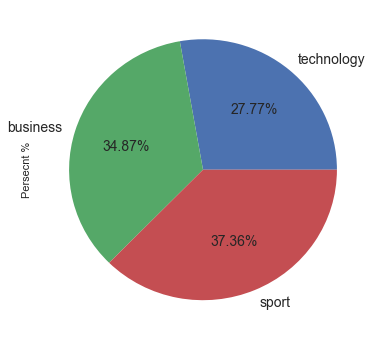

In [795]:
# create three lists to hold the data for each category
counts = merged_df.Category.value_counts().tolist()
series = pd.Series([counts[2], counts[1], counts[0]], 
                   index=lables, 
                   name='Persecnt %')
#  Display Pie chart:
series.plot.pie(fontsize=14, autopct='%.2f%%', figsize=(6, 6))

month-jan-2017.html 122
month-feb-2017.html 127
month-mar-2017.html 122
month-apr-2017.html 122
month-may-2017.html 117
month-jun-2017.html 118
month-jul-2017.html 127
month-aug-2017.html 119
month-sep-2017.html 116
month-oct-2017.html 128
month-nov-2017.html 125
month-dec-2017.html 118


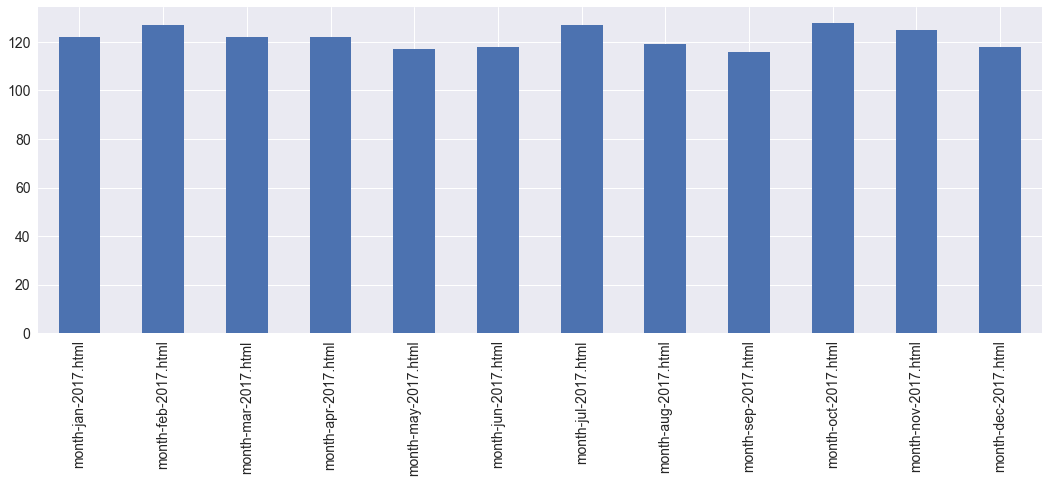

In [796]:
months = []
articles_count = []
for item in month_number_of_articles:
    for month,count in item.items():
        months.append(month)
        articles_count.append(count)
        print('{} {}'.format(month, count))

series = pd.Series(articles_count, index=months)
# #  Display Pie chart:
series.plot.bar(fontsize=14, figsize=(18, 6))

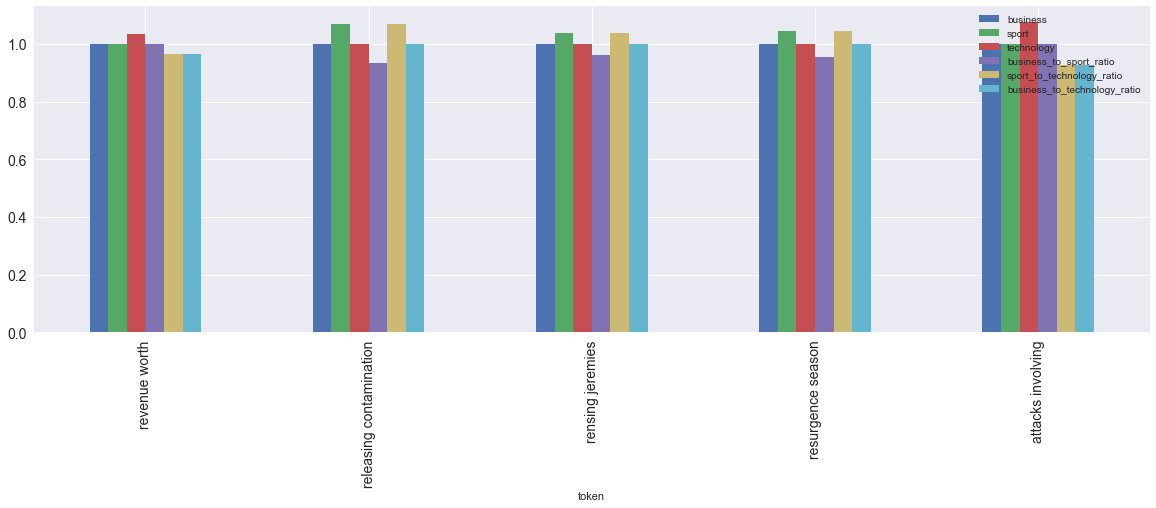

In [797]:
plt.figure()
data = tokens.sample(5, random_state=6)
data.plot.bar(fontsize=14,figsize=(20, 6))
plt.show()

### Tentative Conclusion
Further in-depth studies and tests could be carried out to make statistically significant results. However, there doesn't seem to be much of a differen tbetween:
- The **MultinomialNB and KNeighborsClassifier** in the accurcy. Both gave us very good ones **98% and 95%**.
- **MultinomialNB** is very fast time: **39.3 ms** compared to **KNeighborsClassifier** time: **3.7 ms**.
it worth to note that using **MultinomialNB** for intial testing is a good idea when you have a large data set and limited time. However, others might provide better results but takes longer time.
- The prediction accuracy is almost identical in our case. The only different is the speed and times to train the data.
- **"The sport category"** is the mosdt predicted documents overall with **100% MultinomialNB and 98% KNeighborsClassifier**

Despiset the differences between the two, thir prections is very similar in our case using this specific data set and accuracy is very accurate. 

## Accuracy for both Classifier

([<matplotlib.axis.XTick at 0x1a33866b70>,
 <a list of 2 Text xticklabel objects>)

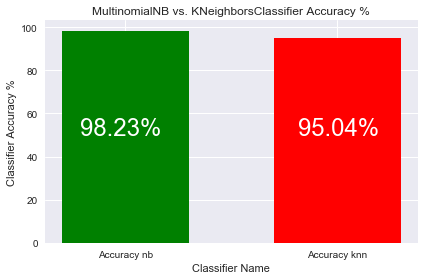

In [798]:
acc_nb = float(accuracy_nb * 100)
acc_knn = float(accuracy_knn * 100)
data = {'Accuracy nb': acc_nb, 'Accuracy knn': acc_knn}
plt.bar(range(len(data)), data.values(), width=0.6, align='center',color='gr')
plt.title('MultinomialNB vs. KNeighborsClassifier Accuracy %')
plt.xlabel('Classifier Name')
plt.ylabel('Classifier Accuracy %')
plt.tight_layout()
plt.text(0.2,0.5, s= str('%.2f%%' % acc_nb),fontsize=24,horizontalalignment='center',transform=ax.transAxes, color='w')
plt.text(0.85,0.5, s= str('%.2f%%' % acc_knn),fontsize=24,horizontalalignment='center',transform=ax.transAxes, color='w')
plt.xticks(range(len(data)), data.keys())

#### Finally:
- Further analysis can be done to pair the most freacunet terms/words to see how they are assosiate with each other and do they state positive or negative meanings.
- Different weighting and stop word filtering metrics could be used to further enhance the accuracy of the words-bag.
- Experiment with different models to intermes of accuracy and speed to see which is the most fitting one for our useage.